<a href="https://colab.research.google.com/github/jmdelmar/ai-science-training-series/blob/main/2024_Oct_15_JosephDelmar_Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

### Dataset
We used a realestate dataset from Kaggle to produce this reduced dataset. This dataset contains the _sale price_ and _above ground square feet_ of many houses. We can use this data for our linear regression.

We use Pandas to read the data file which is stored as Comma Separated Values (CSV). and print the column labels. CSV files are similar to excel sheets.

In [4]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [5]:
n = len(data)

In [6]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [7]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [8]:
denominator = n * sum_x2 - sum_x * sum_x

In [9]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [10]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [11]:
def model(x,m,b):
   return m * x + b

In [12]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [13]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

[029]  dy_i = 88.89 * x + 32912.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


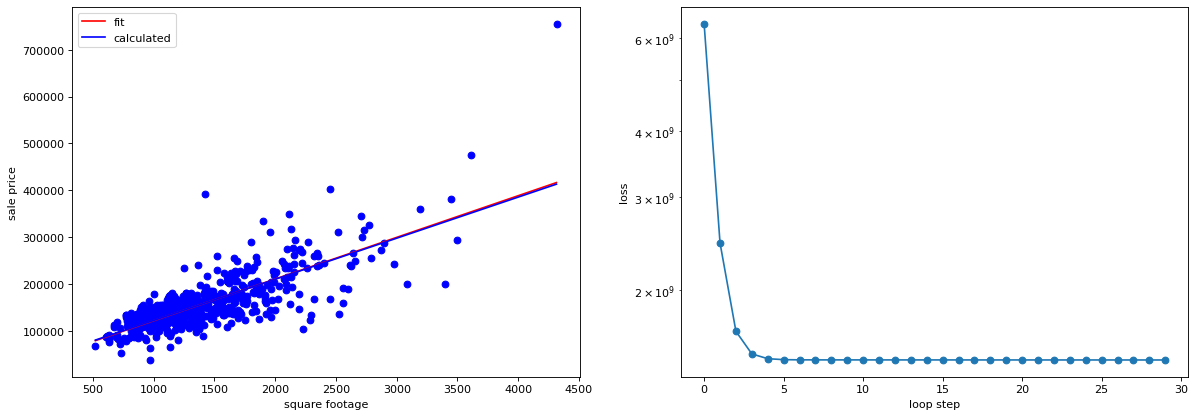

In [14]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

   # close/delete previous plots
   plt.close('all')

   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)



# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512.

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge.
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```

**How to submit your homework**
* Fork the github repo to your personal github
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github.

Follow the below instruction on how to do this:
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

0
1
2
3
4
5


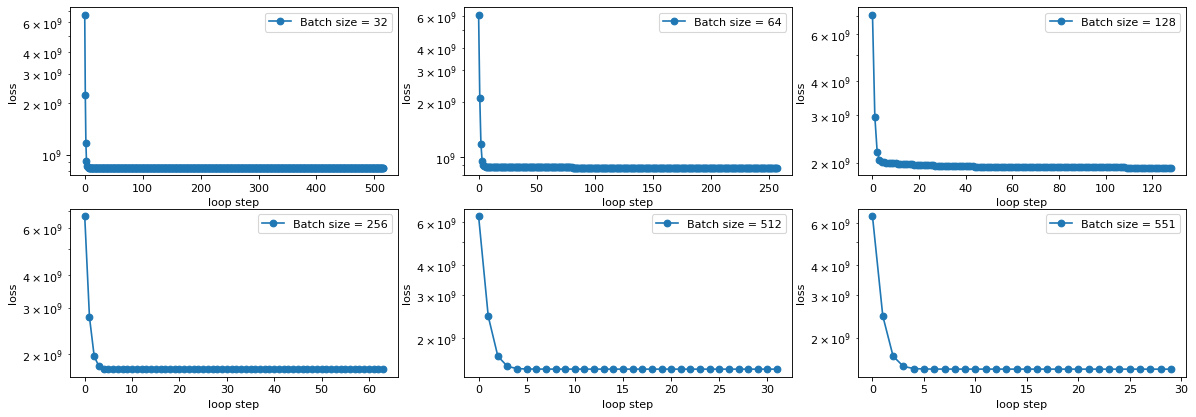

In [17]:
batch_sizes=[32, 64, 128, 256, 512, len(data)]
loss_history = []

plt.close('all')
fig,axs = plt.subplots(2, 3, figsize=(18,6), dpi=80)

axs= axs.flat

for batch_size, ib in zip(batch_sizes, range(len(batch_sizes))):
  data_batch = data.sample(batch_size)
  data_x = data_batch['GrLivArea'].to_numpy()
  data_y = data_batch['SalePrice'].to_numpy()
  loop_N = 30*len(data)//batch_size

  # set our initial slope and intercept
  m = 5.
  b = 1000.
  # set a learning rate for each parameter
  learning_rate_m = 1e-7
  learning_rate_b = 1e-1
  # use these to plot our progress over time
  loss_history_batch = []

  for i in range(loop_N):
    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # calculate the loss value
    loss_value = np.mean(loss(data_x,data_y,m,b))

    # keep a history of our loss values
    loss_history_batch.append(loss_value)

    # print our progress
    # print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

  print(ib)
  loss_history.append(loss_history_batch)
  # plot the loss
  loss_x = np.arange(0,len(loss_history[ib]))
  loss_y = np.asarray(loss_history[ib])
  axs[ib].plot(loss_x,loss_y, 'o-', label=f'Batch size = {batch_sizes[ib]}')
  axs[ib].set_yscale('log')
  axs[ib].set_xlabel('loop step')
  axs[ib].set_ylabel('loss')
  axs[ib].legend()

plt.show()

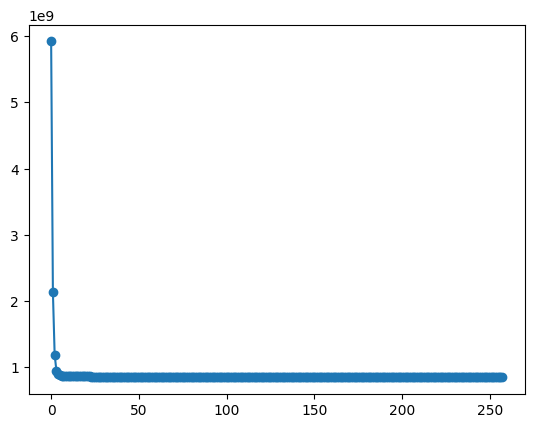

1


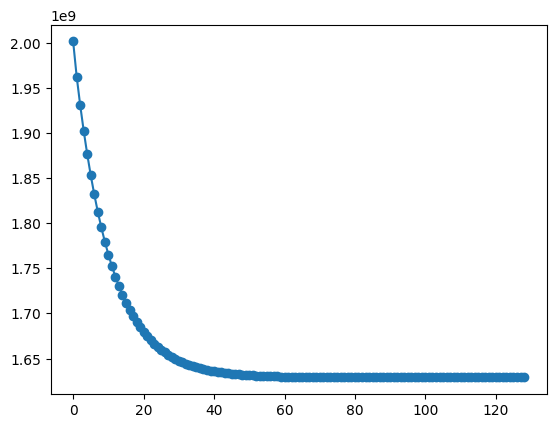

2


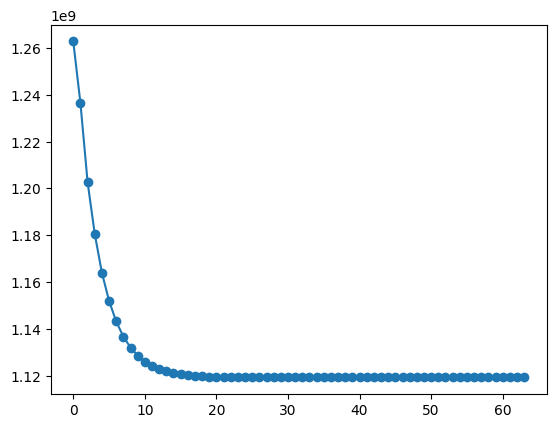

4


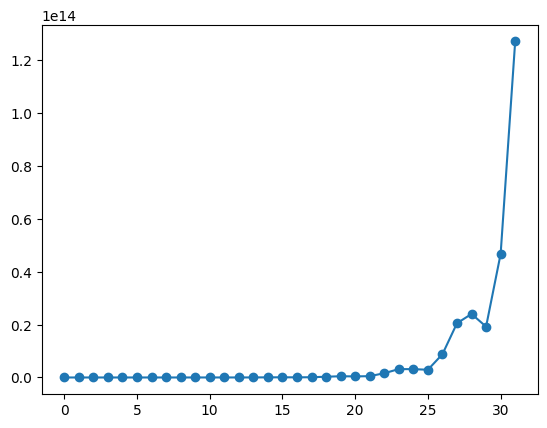

8


In [18]:
converged = True
factor = 1

m=5
b=1000

while converged == True and factor <= 8:
  batch_size = 64*factor
  learning_rate_m = 1e-7 * factor
  learning_rate_b = 1e-1 * factor
  data_batch = data.sample(batch_size)
  data_x = data_batch['GrLivArea'].to_numpy()
  data_y = data_batch['SalePrice'].to_numpy()
  loop_N = 30*len(data)//batch_size

  loss_history = []

  for i in range(loop_N):
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # calculate the loss value
    loss_value = np.mean(loss(data_x,data_y,m,b))

    # keep a history of our loss values
    loss_history.append(loss_value)

  loss_x = np.arange(0,len(loss_history))
  loss_y = np.asarray(loss_history)
  loss_plot=plt.plot(loss_x,loss_y, 'o-')

  plt.show()
  plt.close()

  converged= ((loss_history[-2]-loss_history[-1])/loss_history[-1]) < ((loss_history[-3]-loss_history[-2])/loss_history[-2])
  print(factor)
  factor = 2*factor
